<p style="font-family:font-family; font-size: 2em; color: red; font-weight: bold; text-align: center;">
Anomaly Detection Using Gaussian Mixture Probability Model to Implement Intrusion Detection System 
</p>



<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
  1.Importing required libraries:</p><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import re
import seaborn as sns
from scipy.io import arff
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
import pandas as pd

column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'xAttack','difficulty_level'
]
data_test = pd.read_csv('KDDTest+.txt', header=None, names=column_names)
data_train = pd.read_csv('KDDTrain+.txt', header=None, names=column_names)
data_test = data_test.drop('xAttack', axis=1)
data_train = data_train.drop('xAttack', axis=1)


we removed the target which is XAttack from both datasets 

## data train

In [3]:
data_train.head(7)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21


In [4]:
print(f'\033[94mNumber of records (rows) in the train_data are: {data_train.shape[0]}')
print(f'\033[94mNumber of features (columns) in train_data are: {data_train.shape[1]}')
print(f'\033[94mNumber of duplicate entries in train_data are: {data_train.duplicated().sum()}')
print(f'\033[94mNumber missing values in the train_data are: {sum(data_train.isna().sum())}')

Number of records (rows) in the train_data are: 125973
Number of features (columns) in train_data are: 42
Number of duplicate entries in train_data are: 9
Number missing values in the train_data are: 0


We have 9 duplicates so we have to remove them lately in the data preparation

In [5]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### Visualization of the Data :

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 4. Exploratory data analysis :
</p><br>


### A) Relationships :

### Correlation Matrix HeatMap

In [7]:
def correlation_matrix_heatMap (data_set):
    correlation_matrix = data_set.corr()

    plt.figure(figsize=(30, 30))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()
   

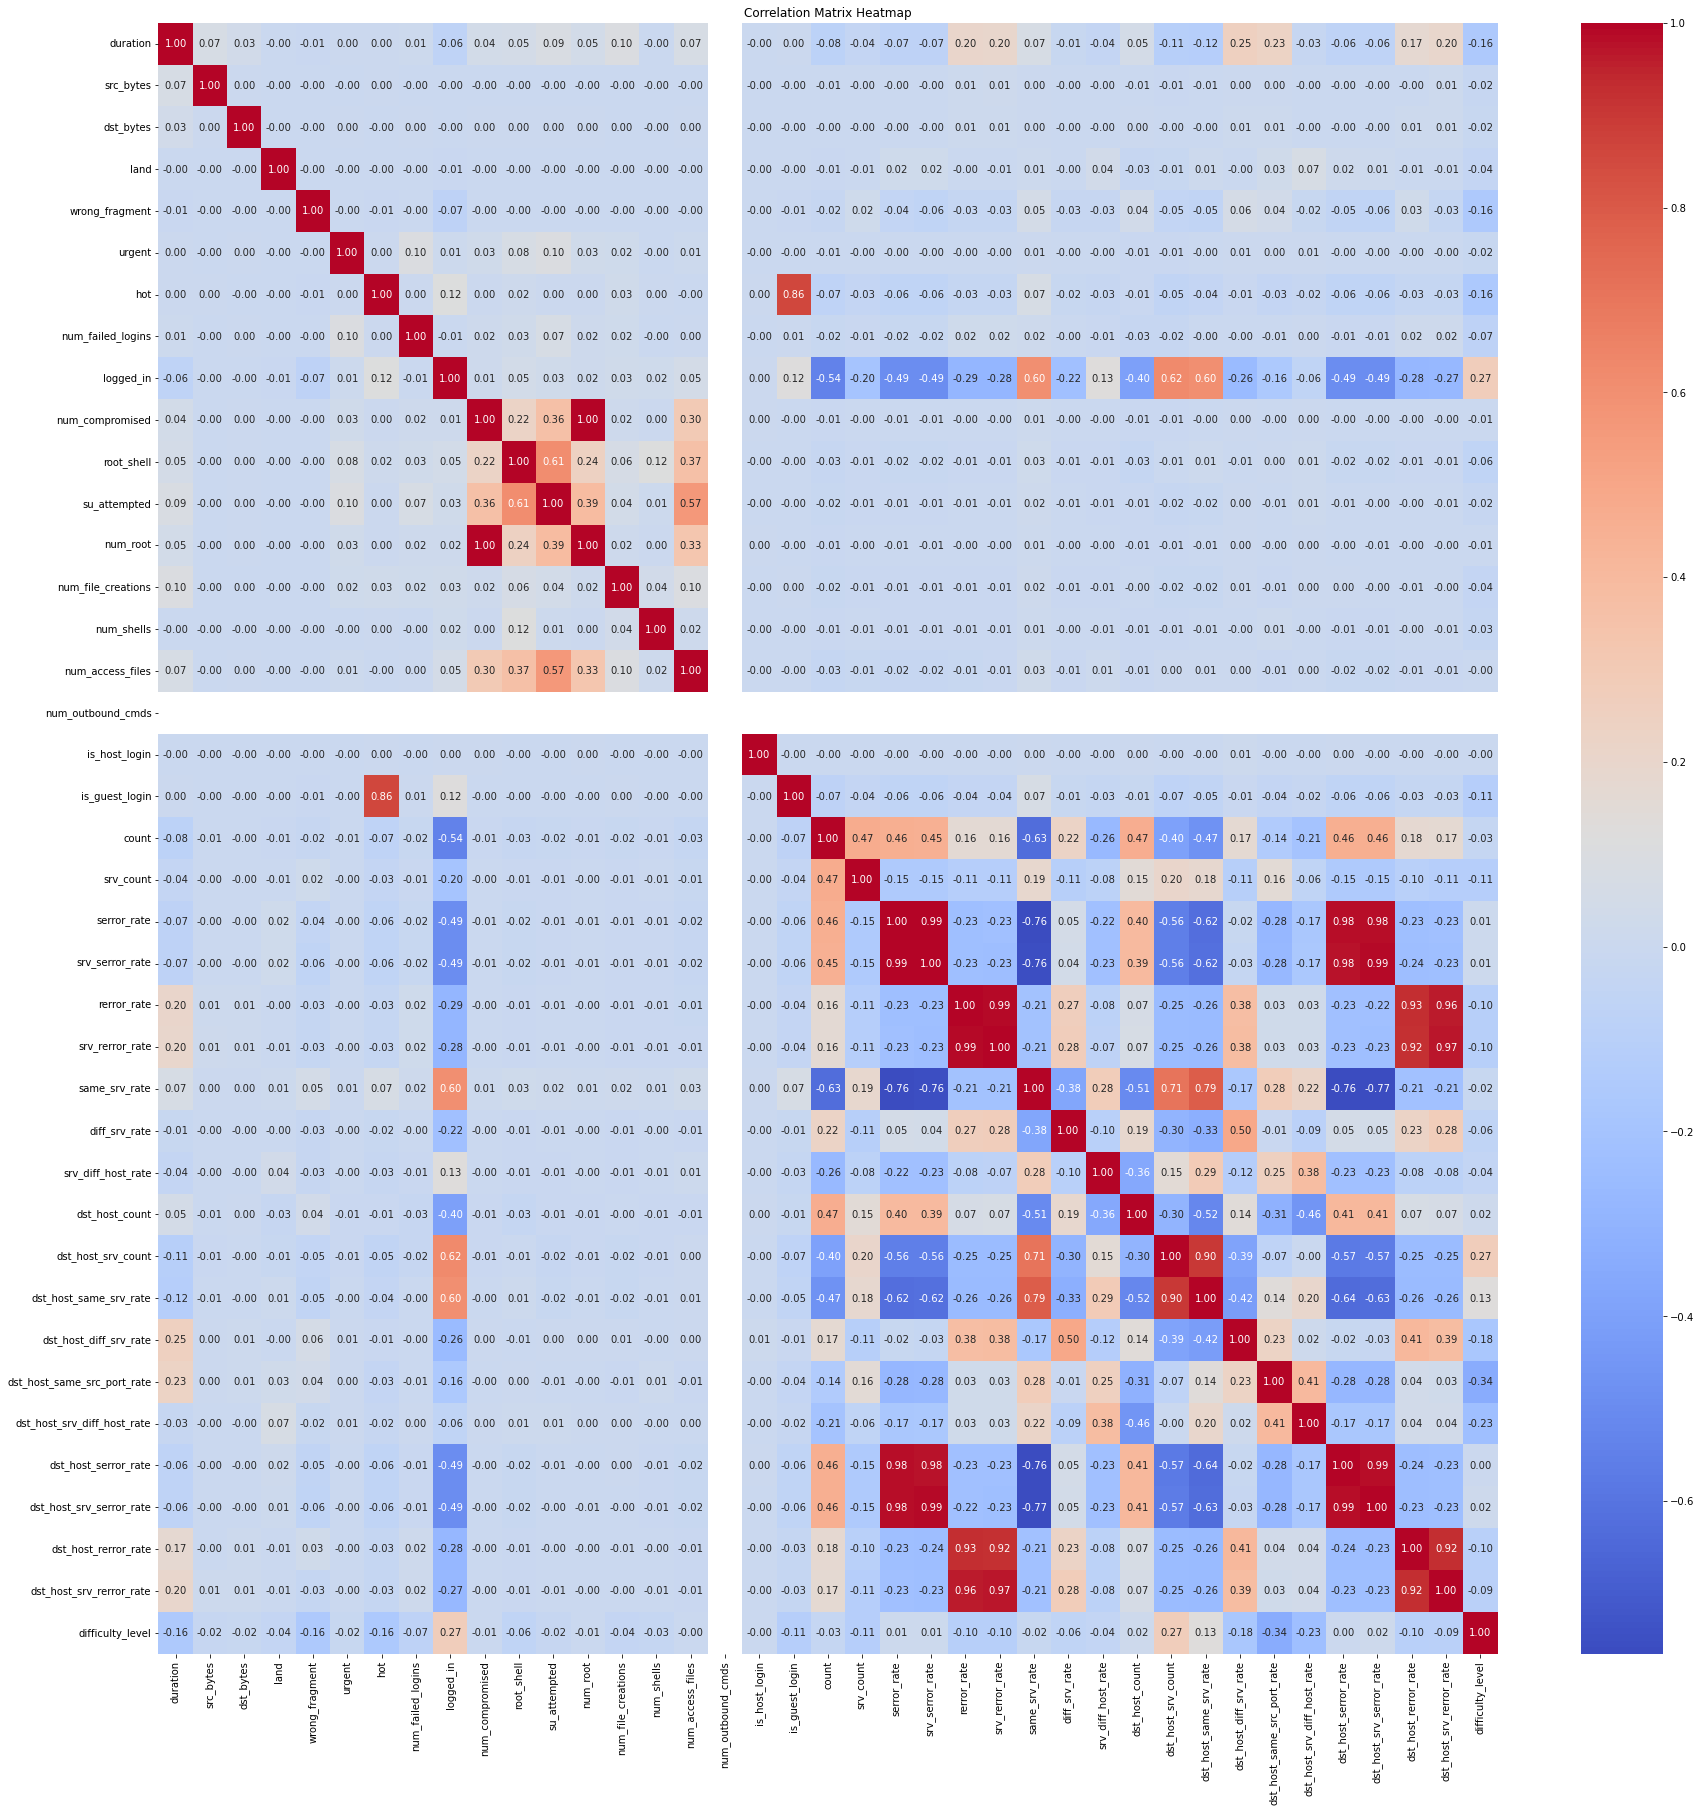

In [8]:
 data=data_train
correlation_matrix_heatMap(data)

In [9]:
def find_highly_correlated_features(data):
    threshold=0.75 # dapres madame stat :)
    correlation_matrix = data.corr()
    correlated_features = np.where(np.abs(correlation_matrix) > threshold)
    correlated_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*correlated_features)
                           if x != y and x < y]
    
    correlated_features_dict = {}
    for f1, f2 in correlated_features:
        if f1 not in correlated_features_dict:
            correlated_features_dict[f1] = [f2]
        else:
            correlated_features_dict[f1].append(f2)

    return correlated_features_dict

In [10]:
highly_correlated = find_highly_correlated_features(data)

for feature, correlated in highly_correlated.items():
    print(f"Feature '{feature}' is highly correlated with: [ {' , '.join(correlated)} ]")

Feature 'hot' is highly correlated with: [ is_guest_login ]
Feature 'num_compromised' is highly correlated with: [ num_root ]
Feature 'serror_rate' is highly correlated with: [ srv_serror_rate , same_srv_rate , dst_host_serror_rate , dst_host_srv_serror_rate ]
Feature 'srv_serror_rate' is highly correlated with: [ same_srv_rate , dst_host_serror_rate , dst_host_srv_serror_rate ]
Feature 'rerror_rate' is highly correlated with: [ srv_rerror_rate , dst_host_rerror_rate , dst_host_srv_rerror_rate ]
Feature 'srv_rerror_rate' is highly correlated with: [ dst_host_rerror_rate , dst_host_srv_rerror_rate ]
Feature 'same_srv_rate' is highly correlated with: [ dst_host_same_srv_rate , dst_host_serror_rate , dst_host_srv_serror_rate ]
Feature 'dst_host_srv_count' is highly correlated with: [ dst_host_same_srv_rate ]
Feature 'dst_host_serror_rate' is highly correlated with: [ dst_host_srv_serror_rate ]
Feature 'dst_host_rerror_rate' is highly correlated with: [ dst_host_srv_rerror_rate ]


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
III. Data Preparation:</p><br>

## 1) Checking for NAN values :

In [11]:
print(data_train.isnull().values.any())
print(data_test.isnull().values.any())

False
False


## 2) Checking for Duplicates values :

In [12]:
duplicate_data_train = data_train[data_train.duplicated(keep = 'last')]
duplicate_data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
3882,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16
5142,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
19299,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13
23632,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
40577,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15
64513,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
72383,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
79859,0,icmp,ecr_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
82966,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16


In [13]:
data_train = data_train.drop_duplicates()
data_test = data_test.drop_duplicates()

## Droping coorelated features:


We identified that among the three categorical features (protocol, service, and flag), only the protocol feature remained after removing the interdependent service and flag variables. However, upon closer examination, we observed that the protocol feature, specifically for the TCP type, provided redundant information, leading us to decide to drop it as well.

In [14]:
data_train = data_train.drop(columns=['flag','service'],axis=1)
data_test= data_test.drop(columns=['flag','service'],axis=1)

In [15]:
data_test = data_test[data_test['protocol_type'] == 'tcp']
data_train = data_train[data_train['protocol_type'] == 'tcp']

data_test = data_test.drop('protocol_type', axis=1)
data_train = data_train.drop('protocol_type', axis=1)

In [16]:
data_train.shape

(102689, 39)

The unsupervised features are designed to highlight anomalies, so we should concentrate on features where there is router activity (message transmission). In such cases, attacks can occur. Therefore, we need to exclude all features that are above the third layer (network layer).

In [17]:
features_to_drop = ['hot', 'logged_in', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted',
                    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'urgent']

data_test = data_test.drop(features_to_drop, axis=1)
data_train = data_train.drop(features_to_drop, axis=1)

In [18]:
data_train.shape

(102689, 26)

As observed in the correlation heatmap, we will exclude 'num_outbound_cmds' as it exhibits no correlation with any other feature

In [19]:
data_test = data_test.drop('num_outbound_cmds', axis=1)
data_train = data_train.drop('num_outbound_cmds', axis=1)

In [20]:
data_train.shape

(102689, 25)

The difficulty level does not provide significant information, so we need to drop it

In [21]:
data_test = data_test.drop('difficulty_level', axis=1)
data_train = data_train.drop('difficulty_level', axis=1)

In [22]:
data_train.shape

(102689, 24)

After deleting the unnecessary features, we now have a dataset with a shape of (102689, 24)

Now, we will apply an unsupervised algorithm to each instance in our dataset

## d_raw: The original NSL dataset without any transformation of the numerical values

In [23]:
d_raw=data_train

## Normalization
### d_norm: The original NSL dataset with the normal training values normal-ized to the range [0-1] and the remaining values normalized according to the previous scaler.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d_norm = scaler.fit_transform(d_raw)
data_test_scaled = scaler.transform(data_test)
d_norm = pd.DataFrame(d_norm, columns=d_raw.columns)




In [25]:
d_norm

,duration,src_bytes,dst_bytes,land,wrong_fragment,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.003914,0.012270,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.240705,0.036810,1.00,1.00,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.009785,0.030675,0.20,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.058708,0.196319,0.00,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.236791,0.116564,0.00,0.00,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,2.601517e-07,2.862732e-07,0.0,0.0,0.005871,0.067485,0.33,0.09,0.0,0.0,1.00,0.00,0.18,0.011765,1.000000,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
102685,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.360078,0.153374,1.00,1.00,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
102686,0.0,1.616709e-06,2.931438e-07,0.0,0.0,0.001957,0.006135,0.00,0.00,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
102687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.281800,0.049080,1.00,1.00,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


### d_raw_pca: The uncorrelated version of the original NSL dataset with the same number of features.

In [26]:
from sklearn.decomposition import PCA
d_raw_PCA=d_raw 
pca_train = PCA()
principal_components_train = pca_train.fit_transform(d_raw_PCA)
pca_test = PCA()
explained_variance_ratio_train = pca_train.explained_variance_ratio_
d_raw_PCA

,duration,src_bytes,dst_bytes,land,wrong_fragment,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,2,2,0.00,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
2,0,0,0,0,0,123,6,1.00,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,5,5,0.20,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,30,32,0.00,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,0,0,0,121,19,0.00,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,359,375,0,0,3,11,0.33,0.09,0.0,0.0,1.00,0.00,0.18,3,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
125968,0,0,0,0,0,184,25,1.00,1.00,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125970,0,2231,384,0,0,1,1,0.00,0.00,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,0,0,0,0,144,8,1.00,1.00,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


### d_norm_pca: The uncorrelated version of the normalized dataset :

In [27]:
from sklearn.decomposition import PCA
d_norm_pca=d_norm
pca_train = PCA()
principal_components_train = pca_train.fit_transform(d_norm_pca)
explained_variance_ratio_train = pca_train.explained_variance_ratio_
d_norm_pca = pd.DataFrame(d_norm_pca, columns=d_raw.columns)
d_norm_pca

,duration,src_bytes,dst_bytes,land,wrong_fragment,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.003914,0.012270,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.240705,0.036810,1.00,1.00,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.009785,0.030675,0.20,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.058708,0.196319,0.00,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.236791,0.116564,0.00,0.00,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102684,0.0,2.601517e-07,2.862732e-07,0.0,0.0,0.005871,0.067485,0.33,0.09,0.0,0.0,1.00,0.00,0.18,0.011765,1.000000,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00
102685,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.360078,0.153374,1.00,1.00,0.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
102686,0.0,1.616709e-06,2.931438e-07,0.0,0.0,0.001957,0.006135,0.00,0.00,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
102687,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.281800,0.049080,1.00,1.00,0.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


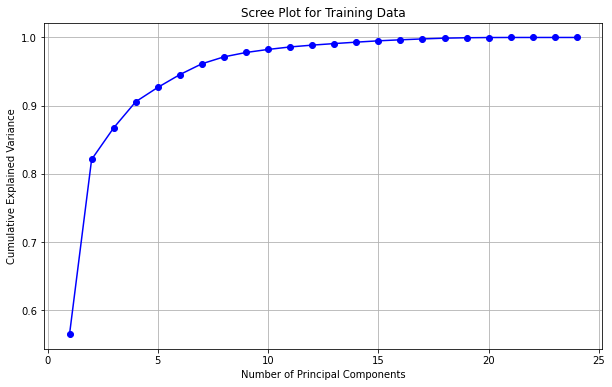

In [28]:
cumulative_variance_train = np.cumsum(explained_variance_ratio_train)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_train) + 1), cumulative_variance_train, marker='o', linestyle='-', color='b')
plt.title('Scree Plot for Training Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



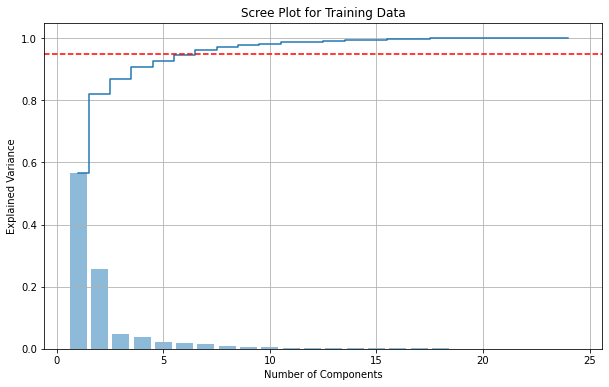

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio_train) + 1), explained_variance_ratio_train, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratio_train) + 1), np.cumsum(explained_variance_ratio_train), where='mid')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for Training Data')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.grid()
plt.show()

We can see that the number of the cumulative explained variance scree plot is often more informative for deciding how many principal components to retain. It shows the cumulative explained variance as you add more principal components
we remarke that we need 6 features to obtain the 95% thresh hold so we should retain those 6 components.

## K-means

In [30]:
# à installer si c'est la première à utiliser yellowbrick.cluster
#!pip install yellowbrick

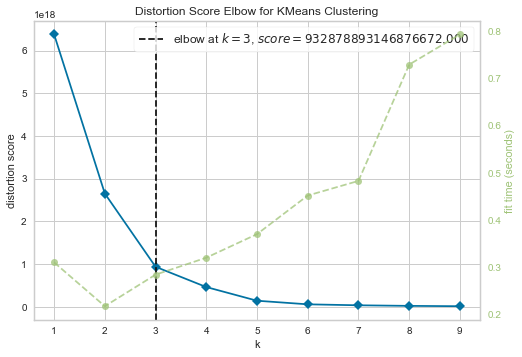

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(d_raw)   # Fit the data to the visualizer
visualizer.show()  

    Based on the elbow graphe we can see that we need only 3 clusters in the train data as said also in the article 

In [32]:
model1=KMeans(n_clusters=3, random_state=42)
model1.fit(d_norm)


KMeans(n_clusters=3, random_state=42)

## Construction of the model K-means (KM-D) for the dataset d_norm :

After obtaining three clusters from the elbow curve analysis, the next step is to determine which clusters correspond to normal features and which ones represent anomalous features.
the first scenario is the first cluster and the second cluster are normal and the third one is abnormal
the next scenario is the first is normal and the two others are abnormal
the third scenario is the first abnormal , the second one is normal and the third one is abnormal 
the fourth scenario is the first abnormal and the other two are normal
so we are going to calculate the distance between every observation and the centroid to see which observations are normal and which ones are abnormal

In [33]:
labels = np.where(model1.labels_ <= 1, 'Normal', 'Abnormal')
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]
percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)
print(df_results)
print(percentage_by_cluster)

        Observation Assigned_Cluster  Distance_to_Centroid
0                 0           Normal              0.955552
1                 1         Abnormal              0.137716
2                 2           Normal              0.583244
3                 3           Normal              0.592877
4                 4           Normal              0.493620
...             ...              ...                   ...
102684       102684           Normal              0.777532
102685       102685         Abnormal              0.117058
102686       102686           Normal              1.296810
102687       102687         Abnormal              0.103875
102688       102688           Normal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       39.007881  18.225303  42.766817           Normal            0
1       51.959384  45.496175   2.544441         Abnormal            1
2       44.121906  10.380964  45.497130           Norma

In [34]:
import numpy as np
import pandas as pd
labels = np.where(model1.labels_ == 0, 'Normal', np.where(model1.labels_ == 1, 'Abnormal', 'Normal'))
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]

percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)

total_normal1= np.sum(labels == 'Normal')
total_abnormal1= np.sum(labels == 'Abnormal')

print(f'Total observations in normal clusters: {total_normal1}')
print(f'Total observations in abnormal cluster: {total_abnormal1}')


        Observation Assigned_Cluster  Distance_to_Centroid
0                 0         Abnormal              0.955552
1                 1           Normal              0.137716
2                 2         Abnormal              0.583244
3                 3         Abnormal              0.592877
4                 4           Normal              0.493620
...             ...              ...                   ...
102684       102684         Abnormal              0.777532
102685       102685           Normal              0.117058
102686       102686         Abnormal              1.296810
102687       102687           Normal              0.103875
102688       102688         Abnormal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       39.007881  18.225303  42.766817         Abnormal            0
1       51.959384  45.496175   2.544441           Normal            1
2       44.121906  10.380964  45.497130         Abnorma

In [35]:
import numpy as np
import pandas as pd
labels = np.where(model1.labels_ <= 1, 'Normal', 'Abnormal')
normal_cluster = np.unique(model1.labels_[labels == 'Normal'])
abnormal_cluster = np.unique(model1.labels_[labels == 'Abnormal'])

print(f'Cluster(s) considered as Normal: {normal_cluster}')
print(f'Cluster(s) considered as Abnormal: {abnormal_cluster}')
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]
percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)


Cluster(s) considered as Normal: [0 1]
Cluster(s) considered as Abnormal: [2]
        Observation Assigned_Cluster  Distance_to_Centroid
0                 0           Normal              0.955552
1                 1         Abnormal              0.137716
2                 2           Normal              0.583244
3                 3           Normal              0.592877
4                 4           Normal              0.493620
...             ...              ...                   ...
102684       102684           Normal              0.777532
102685       102685         Abnormal              0.117058
102686       102686           Normal              1.296810
102687       102687         Abnormal              0.103875
102688       102688           Normal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       39.007881  18.225303  42.766817           Normal            0
1       51.959384  45.496175   2.544441        

In [36]:
labels = np.where(model1.labels_ == 1, 'Normal', 'Abnormal')
normal_cluster = np.unique(model1.labels_[labels == 'Normal'])
abnormal_cluster = np.unique(model1.labels_[labels == 'Abnormal'])
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]
percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)


        Observation Assigned_Cluster  Distance_to_Centroid
0                 0           Normal              0.955552
1                 1         Abnormal              0.137716
2                 2           Normal              0.583244
3                 3           Normal              0.592877
4                 4         Abnormal              0.493620
...             ...              ...                   ...
102684       102684           Normal              0.777532
102685       102685         Abnormal              0.117058
102686       102686           Normal              1.296810
102687       102687         Abnormal              0.103875
102688       102688           Normal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       39.007881  18.225303  42.766817           Normal            0
1       51.959384  45.496175   2.544441         Abnormal            1
2       44.121906  10.380964  45.497130           Norma

## Construction of the model K-means (KM-D) for the dataset d_norm_probs :

In [37]:
labels = np.where(model1.labels_ <= 1, 'Normal', 'Abnormal')
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation': d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]
percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)
print(df_results)
print(percentage_by_cluster)

        Observation Assigned_Cluster  Distance_to_Centroid
0                 0           Normal              0.955552
1                 1         Abnormal              0.137716
2                 2           Normal              0.583244
3                 3           Normal              0.592877
4                 4           Normal              0.493620
...             ...              ...                   ...
102684       102684           Normal              0.777532
102685       102685         Abnormal              0.117058
102686       102686           Normal              1.296810
102687       102687         Abnormal              0.103875
102688       102688           Normal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       39.007881  18.225303  42.766817           Normal            0
1       51.959384  45.496175   2.544441         Abnormal            1
2       44.121906  10.380964  45.497130           Norma

In [38]:
import numpy as np
import pandas as pd
labels = np.where(model1.labels_ == 0, 'Abnormal', np.where(model1.labels_ == 1, 'Normal', 'Abnormal'))
distances_to_centroids = model1.transform(d_norm)
df_results = pd.DataFrame({'Observation':d_norm.index, 'Assigned_Cluster': labels})
df_results['Distance_to_Centroid'] = distances_to_centroids[np.arange(len(distances_to_centroids)), model1.labels_]

percentage_by_cluster = pd.DataFrame(distances_to_centroids, columns=[f'Cluster_{i}' for i in range(model1.n_clusters)])
percentage_by_cluster['Assigned_Cluster'] = labels
percentage_by_cluster['Observation'] = d_norm.index
percentage_by_cluster.iloc[:, :-2] = percentage_by_cluster.iloc[:, :-2].apply(lambda x: x / x.sum() * 100, axis=1)

print(df_results)
print(percentage_by_cluster)

total_normal2 = np.sum(labels == 'Normal')
total_abnormal2 = np.sum(labels == 'Abnormal')

print(f'Total observations in normal clusters: {total_normal2}')
print(f'Total observations in abnormal cluster: {total_abnormal2}')


        Observation Assigned_Cluster  Distance_to_Centroid
0                 0           Normal              0.955552
1                 1         Abnormal              0.137716
2                 2           Normal              0.583244
3                 3           Normal              0.592877
4                 4         Abnormal              0.493620
...             ...              ...                   ...
102684       102684           Normal              0.777532
102685       102685         Abnormal              0.117058
102686       102686           Normal              1.296810
102687       102687         Abnormal              0.103875
102688       102688           Normal              0.889512

[102689 rows x 3 columns]
        Cluster_0  Cluster_1  Cluster_2 Assigned_Cluster  Observation
0       39.007881  18.225303  42.766817           Normal            0
1       51.959384  45.496175   2.544441         Abnormal            1
2       44.121906  10.380964  45.497130           Norma

C:\Users\user\AppData\Local\Temp\ipykernel_7000\4071380905.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)
C:\Users\user\AppData\Local\Temp\ipykernel_7000\4071380905.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)


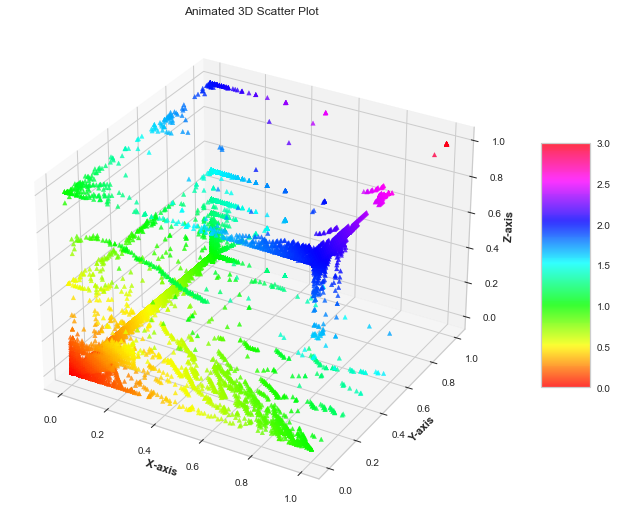

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Assuming X is your data
# Replace X with your actual data

# Creating figure
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

# Add x, y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(d_norm.dst_host_serror_rate,d_norm.dst_host_srv_count,d_norm.serror_rate, alpha=0.8,
                    c=(d_norm.dst_host_serror_rate+d_norm.dst_host_srv_count +d_norm.serror_rate),
                    cmap=my_cmap,
                    marker='^')

plt.title("Animated 3D Scatter Plot")
ax.set_xlabel('X-axis', fontweight='bold')
ax.set_ylabel('Y-axis', fontweight='bold')
ax.set_zlabel('Z-axis', fontweight='bold')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)
def update(frame):
    ax.view_init(elev=20, azim=frame) 
    return sctt,
animation = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50)
plt.show()


## d_raw_probs: We apply the FGMPM to the original NSL dataset values and change each feature value for the occurrence probability of each feature in the normal model. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated 

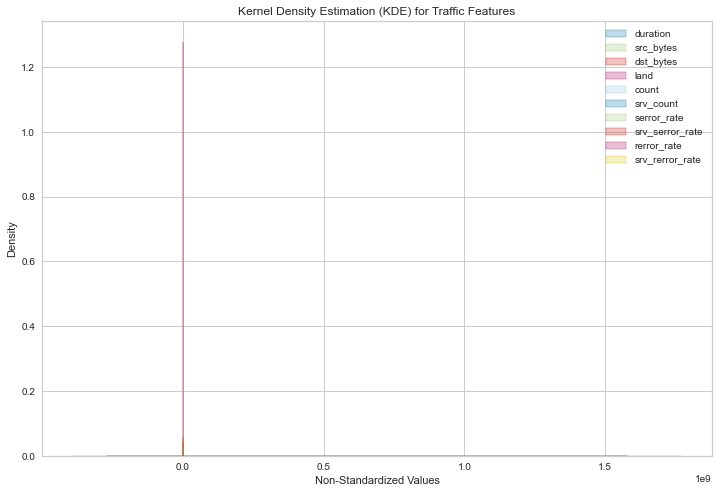

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
d_raw_probs=d_raw[selected_features]
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.kdeplot(data=d_raw_probs, x=feature, fill=True, label=feature,bw=20)
plt.title('Kernel Density Estimation (KDE) for Traffic Features')
plt.xlabel('Non-Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()


### d_norm_probs: We apply the FGPM to the normalized version of the dataset : 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated 

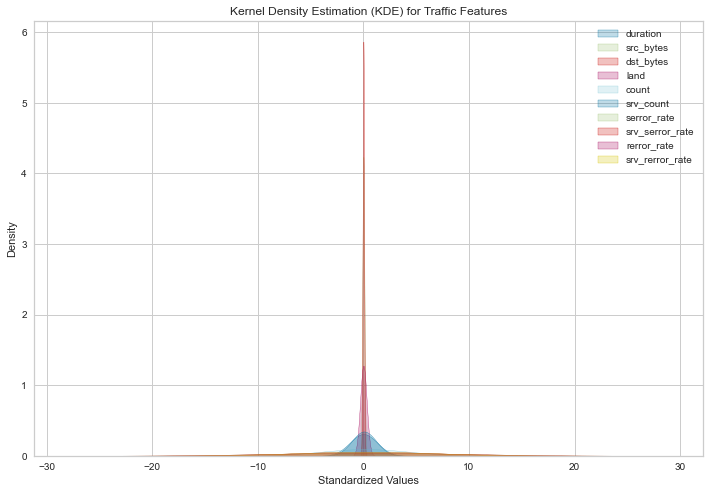

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
subset_data = d_norm[selected_features]
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
plt.title('Kernel Density Estimation (KDE) for Traffic Features')
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()


### d_norm_pca_probs: The occurrence probabilities of the uncorrelated features of the normalized dataset :

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated 

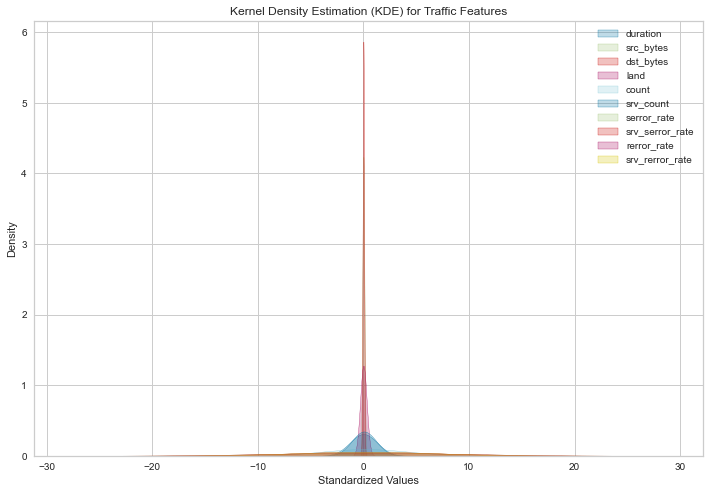

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate']
subset_data = d_norm_pca[selected_features]
plt.figure(figsize=(12, 8))
for feature in selected_features:
    sns.kdeplot(data=subset_data, x=feature, fill=True, label=feature,bw=20)
plt.title('Kernel Density Estimation (KDE) for Traffic Features')
plt.xlabel('Standardized Values')
plt.ylabel('Density')
plt.legend()
plt.show()


as we can see the most high density is provided by dst_bytes so it affects more the trafic and then we have srv_serror rate ,and then land and rerror rate and finally we have srv_count , duration and count .

Kde provides  insights into the distribution of values for each traffic feature in d_raw The shape of the KDE plot indicates the density of data points at different values of the features.
Dst_bytes (Destination Bytes): This feature has the highest density, indicating that there are many data points concentrated around certain values of dst_bytes. This suggests that dst_bytes is a significant and commonly occurring feature in
data_tr.
Srv_serror_rate (Server SYN Error Rate): This feature has the second-highest density. The higher density suggests that the distribution of srv_serror_rate values is concentrated around specific values.

Land: The land feature has a notable density, suggesting that there are certain conditions where the source and destination are the same host/port (land connections), and these conditions occur frequently enough to contribute to the overall density.

Rerror_rate (Error Rate): The density of the rerror_rate feature is also noteworthy, indicating that certain error rates occur more frequently in the dataset.

Srv_count (Server Count): The density of srv_count is lower compared to the previous features, suggesting that the distribution of server counts is more spread out, and there is less concentration around specific values.

Duration: The density of the duration feature is lower than some other features, suggesting a broader range of durations in the dataset.

Count: The density of the count feature is also relatively lower, indicating a spread of connection counts in the dataset.

## Probability Voting Scheme

## Probability Voting Scheme for d_norm_probs :

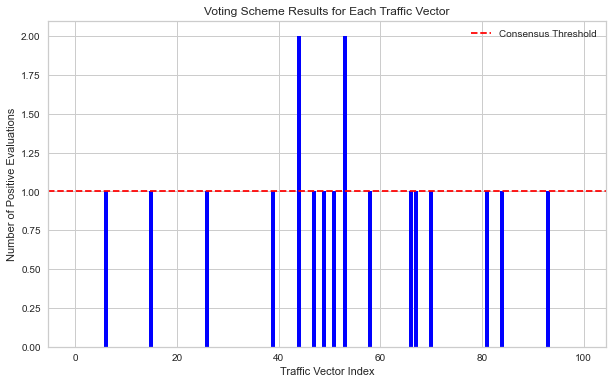

The entire traffic vector is classified as anomalous.


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
np.random.seed(42)
d_norm_probs = np.random.rand(100, 10)  # 100 samples with 10 features
def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)
def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)
alpha = 0.05  # Example: 5% error tolerance for normal features
consensus = 1
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_norm_probs)
feature_probabilities = compute_feature_probabilities(d_norm_probs, gmm)
threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))
positive_evaluations = compute_positive_evaluations(d_norm_probs, threshold)
plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()
anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


## Probability Voting Scheme for d_norm_pca_probs :

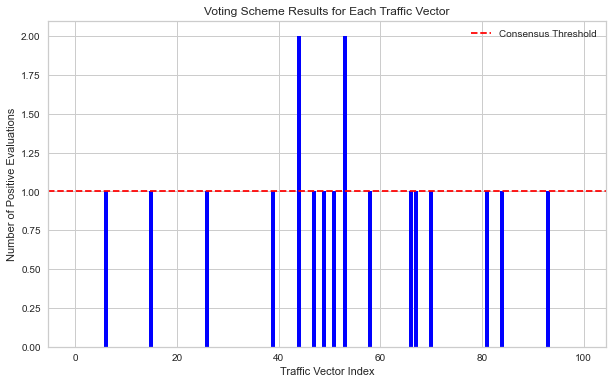

The entire traffic vector is classified as anomalous.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
np.random.seed(42)
d_norm_pca_probs = np.random.rand(100, 10)  # 100 samples with 10 features
def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)
def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)
alpha = 0.05  # Example: 5% error tolerance for normal features
consensus = 1
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_norm_pca_probs)
feature_probabilities = compute_feature_probabilities(d_norm_pca_probs, gmm)
threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))
positive_evaluations = compute_positive_evaluations(d_norm_pca_probs, threshold)
d_raw_probs = pd.DataFrame(d_raw_probs)
plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()
anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


## Probability Voting Scheme for d_raw_probs :

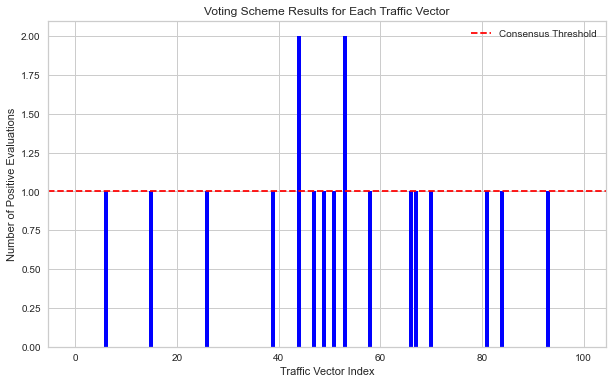

The entire traffic vector is classified as anomalous.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
np.random.seed(42)
d_raw_probs  = np.random.rand(100, 10) 
def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)
def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)

alpha = 0.05  
consensus = 1
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_raw_probs )

feature_probabilities = compute_feature_probabilities(d_raw_probs , gmm)

threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))

positive_evaluations = compute_positive_evaluations(d_raw_probs, threshold)
d_raw_probs = pd.DataFrame(d_raw_probs)

plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()

anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


## Probability Voting Scheme for d_raw_pca_probs :

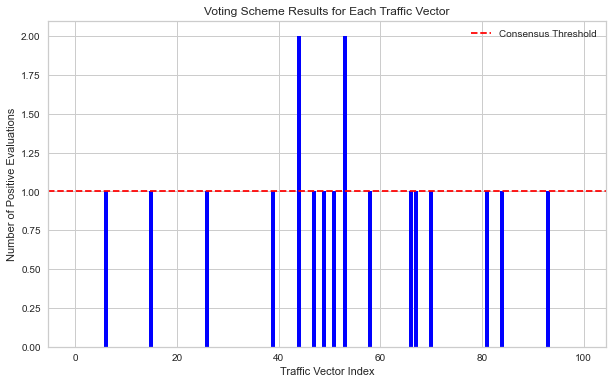

The entire traffic vector is classified as anomalous.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

np.random.seed(42)
d_raw_pca_probs = np.random.rand(100, 10)  

def compute_feature_probabilities(data, gmm):
    return gmm.score_samples(data)

def compute_positive_evaluations(data, threshold):
    return np.sum(data > threshold, axis=1)

alpha = 0.05  
consensus = 1
gmm = GaussianMixture(n_components=2, init_params='random', random_state=42)
gmm.fit(d_raw_pca_probs)
feature_probabilities = compute_feature_probabilities(d_raw_pca_probs, gmm)
threshold = np.percentile(feature_probabilities, 100 * (1 - alpha))
positive_evaluations = compute_positive_evaluations(d_raw_pca_probs, threshold)
plt.figure(figsize=(10, 6))
plt.bar(range(len(positive_evaluations)), positive_evaluations, color='blue')
plt.axhline(y=consensus, color='red', linestyle='--', label='Consensus Threshold')
plt.xlabel('Traffic Vector Index')
plt.ylabel('Number of Positive Evaluations')
plt.title('Voting Scheme Results for Each Traffic Vector')
plt.legend()
plt.show()
anomalous_vector_count = np.sum(positive_evaluations >= consensus)
if anomalous_vector_count >= consensus:
    print("The entire traffic vector is classified as anomalous.")
else:
    print("The entire traffic vector is classified as normal.")


# SVM

## SVM for the dataset d_norm :

In [49]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_norm)
predictions = svm_model.predict(d_norm)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


Normal instances: 101682
Anomalous instances: 1007


## SVM for the dataset d_norm_probs :

In [50]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_norm_probs)
predictions = svm_model.predict(d_norm_probs)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


Normal instances: 97
Anomalous instances: 3


## SVM for the dataset d_norm_pca :

In [75]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_norm_pca)
predictions = svm_model.predict(d_norm_pca)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


Normal instances: 101682
Anomalous instances: 1007


## SVM for the dataset d_norm_pca_probs :

In [52]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_norm_pca_probs)
predictions = svm_model.predict(d_norm_pca_probs)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


Normal instances: 97
Anomalous instances: 3


## SVM for the dataset d_raw :

In [53]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_raw)
predictions = svm_model.predict(d_raw)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_raw_probs :

In [54]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_raw_probs)
predictions = svm_model.predict(d_raw_probs)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


Normal instances: 97
Anomalous instances: 3


## SVM for the dataset d_raw_pca :

In [55]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_raw_pca)
predictions = svm_model.predict(d_raw_pca)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


## SVM for the dataset d_raw_pca_probs :

In [74]:
from sklearn.svm import OneClassSVM
import numpy as np
svm_model = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
svm_model.fit(d_raw_pca_probs)
predictions = svm_model.predict(d_raw_pca_probs)
predictions_binary = np.where(predictions == -1, 1, 0)
normal_count = np.sum(predictions_binary == 0)
anomaly_count = np.sum(predictions_binary == 1)

# Print the counts
print("Normal instances:", normal_count)
print("Anomalous instances:", anomaly_count)


## BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
### BIRCH est un algorithme de clustering hiérarchique qui a été conçu pour gérer des ensembles de données volumineux et pour fonctionner efficacement avec des contraintes de mémoire. Voici une explication du théorème BIRCH :

### Construction de la Structure CF (Clustering Feature) :

BIRCH utilise une structure appelée Clustering Feature (CF) pour représenter chaque cluster. Un CF comprend des informations agrégées telles que la somme, la somme des carrés et le nombre d'éléments dans le cluster. Balanced Iterative Reducing :

L'algorithme suit une approche itérative pour construire et ajuster la structure CF tout en maintenant un équilibre entre la taille de la structure et la précision du clustering. La structure est ajustée à mesure que de nouvelles données sont ajoutées, et les clusters peuvent fusionner si nécessaire. Utilisation de la Structure CF pour le Clustering :

Une fois la structure CF construite, elle est utilisée pour effectuer le clustering. Les points de données sont affectés au cluster dont le CF est le plus proche.

## d_raw


C:\Users\user\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


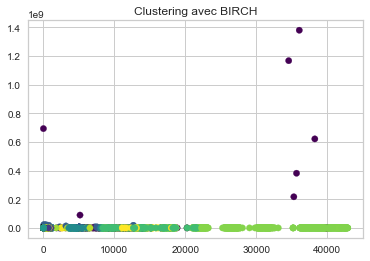

Nombre de clusters : 82652
Clusters uniques : [    0     1     2 ... 83456 83457 83458]


In [57]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
d_raw_birch = d_raw.copy()
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_raw_birch)
y_birch = birch.predict(d_raw_birch)
d_raw_np = d_raw.to_numpy()
plt.scatter(d_raw_np[:, 0], d_raw_np[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()
train_f_birch = d_raw[y_birch > 0]
train_c_birch = d_raw[y_birch <= 0]
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)
print("Nombre de clusters :", num_clusters)
print("Clusters uniques :", unique_clusters)




## d_norm

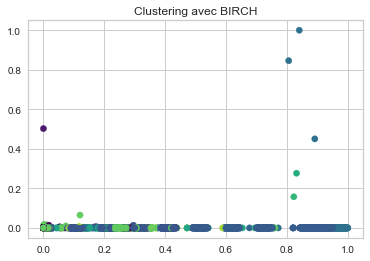

Nombre de clusters après normalisation: 284
Clusters uniques après normalisation : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 

In [58]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
d_raw_birch1 = d_norm.copy()
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_raw_birch1)
y_birch = birch.predict(d_raw_birch1)
d_norm_np = d_norm.to_numpy()
plt.scatter(d_norm_np[:, 0], d_norm_np[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()
train_f_birch = d_norm[y_birch > 0]
train_c_birch = d_norm[y_birch <= 0]
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)
print("Nombre de clusters après normalisation:", num_clusters)
print("Clusters uniques après normalisation :", unique_clusters)



### d_norm_pca : 

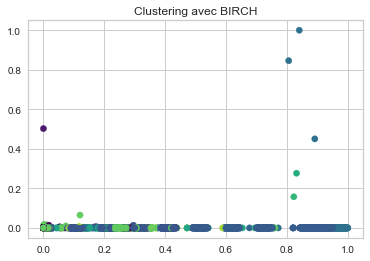

Nombre de clusters après pca : 284
Clusters uniques après pca: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
d_norm_birch2 = d_norm_pca.copy()
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm_birch2)
y_birch = birch.predict(d_norm_birch2)
d_norm_pca_np = d_norm_pca.to_numpy()
plt.scatter(d_norm_pca_np[:, 0], d_norm_pca_np[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()
train_f_birch = d_norm_pca[y_birch > 0]
train_c_birch = d_norm_pca[y_birch <= 0]
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)
print("Nombre de clusters après pca :", num_clusters)
print("Clusters uniques après pca:", unique_clusters)

## d_raw_probs :

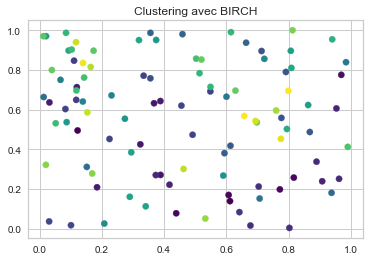

Nombre de clusters : 51
Clusters uniques: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [61]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
d_raw_probs_birch2 = d_raw_probs.copy()
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_raw_probs_birch2)
y_birch = birch.predict(d_raw_probs_birch2)
d_raw_probs_np =d_raw_probs.to_numpy()
plt.scatter(d_raw_probs_np[:, 0],d_raw_probs_np[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()
train_f_birch =d_raw_probs[y_birch > 0]
train_c_birch = d_raw_probs[y_birch <= 0]
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)
print("Nombre de clusters :", num_clusters)
print("Clusters uniques:", unique_clusters)


## d_raw_pca_probs :

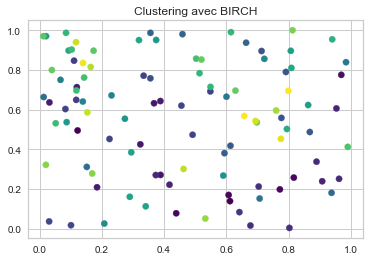

Nombre de clusters : 51
Clusters uniques: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [62]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
d_raw_pca_birch2 = d_raw_pca_probs.copy()
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_raw_pca_birch2)
y_birch = birch.predict(d_raw_pca_birch2)
plt.scatter(d_raw_pca_probs[:, 0],d_raw_pca_probs[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()
train_f_birch =d_raw_pca_probs[y_birch > 0]
train_c_birch = d_raw_pca_probs[y_birch <= 0]
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)
print("Nombre de clusters :", num_clusters)
print("Clusters uniques:", unique_clusters)


## d_norm_probs:

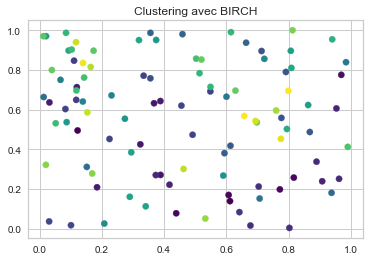

Nombre de clusters  : 51
Clusters uniques: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [63]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
d_norm_probs_birch2 = d_norm_probs.copy()
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm_probs_birch2)
y_birch = birch.predict(d_norm_probs_birch2)
plt.scatter(d_norm_probs[:, 0],d_norm_probs[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()
train_f_birch =d_norm_probs[y_birch > 0]
train_c_birch = d_norm_probs[y_birch <= 0]
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)
print("Nombre de clusters  :", num_clusters)
print("Clusters uniques:", unique_clusters)


## d_norm_pca_probs:

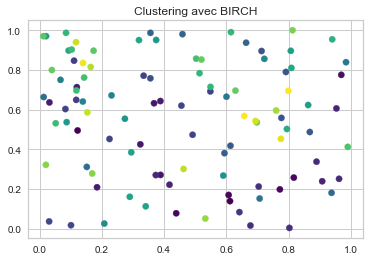

Nombre de clusters après pca : 51
Clusters uniques après pca: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [64]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
d_norm_pca_birch2 = d_norm_pca_probs.copy()
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(d_norm_pca_birch2)
y_birch = birch.predict(d_norm_pca_birch2)
plt.scatter(d_norm_pca_probs[:, 0],d_norm_pca_probs[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()
train_f_birch =d_norm_pca_probs[y_birch > 0]
train_c_birch = d_norm_pca_probs[y_birch <= 0]
unique_clusters = np.unique(y_birch)
num_clusters = len(unique_clusters)
print("Nombre de clusters après pca :", num_clusters)
print("Clusters uniques après pca:", unique_clusters)



## MLP 

MLP on d_raw

In [65]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_raw, d_raw)
encoded_data = autoencoder.predict(d_raw)



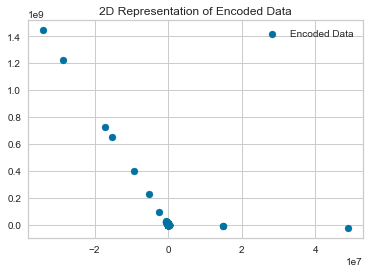

In [66]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(d_raw, d_raw) 
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], label='Encoded Data')
plt.title('2D Representation of Encoded Data')
plt.legend()
plt.show()


MLP on d_norm

In [67]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_norm, d_norm)
encoded_data1= autoencoder.predict(d_norm)


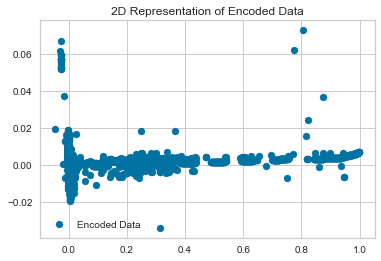

In [68]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(d_norm, d_norm) 
plt.scatter(encoded_data1[:, 0], encoded_data1[:, 1], label='Encoded Data')
plt.title('2D Representation of Encoded Data')
plt.legend()
plt.show()


MLP on d_norm_pca

In [69]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_norm_pca, d_norm_pca)
encoded_data2= autoencoder.predict(d_norm_pca)

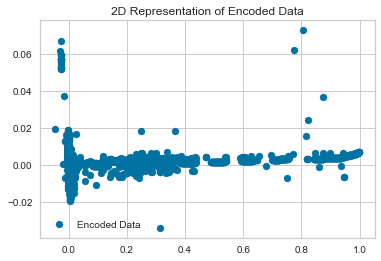

In [70]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(d_norm_pca,d_norm_pca) 
plt.scatter(encoded_data2[:, 0], encoded_data2[:, 1], label='Encoded Data')
plt.title('2D Representation of Encoded Data')
plt.legend()
plt.show()

## MLP on  d_raw_probs :

In [71]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
import numpy as np
X, _ = make_classification(n_samples=10000, n_features=24, n_classes=2, random_state=42)
autoencoder = MLPRegressor(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)
autoencoder.fit(d_raw_probs,d_raw_probs)
encoded_data3= autoencoder.predict(d_raw_probs)

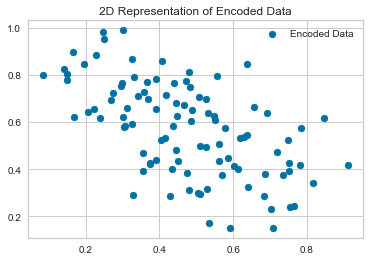

In [72]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(d_raw_probs,d_raw_probs) 
plt.scatter(encoded_data3[:, 0], encoded_data3[:, 1], label='Encoded Data')
plt.title('2D Representation of Encoded Data')
plt.legend()
plt.show()

Evaluation

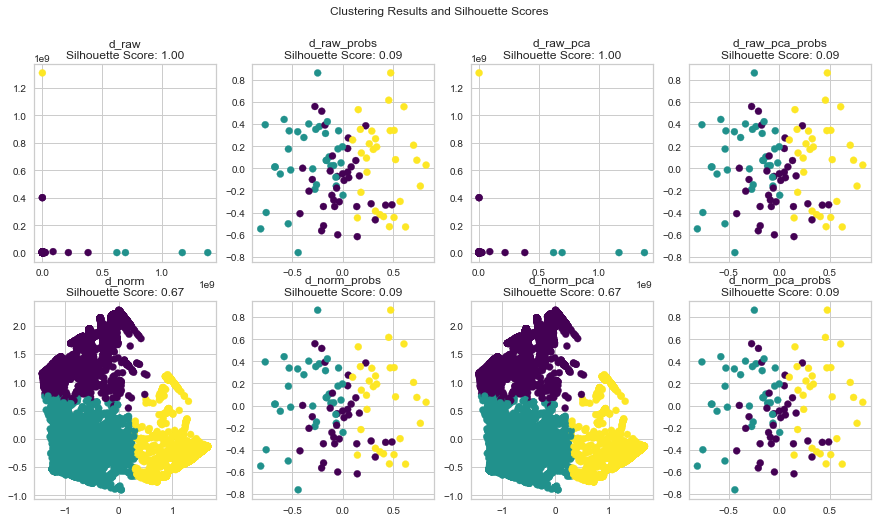

In [73]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data_sets = {
    'd_raw': d_raw,
    'd_raw_probs': d_raw_probs,
    'd_raw_pca': d_raw_PCA,
    'd_raw_pca_probs': d_raw_pca_probs,
    'd_norm': d_norm,
    'd_norm_probs': d_norm_probs,
    'd_norm_pca': d_norm_pca,
    'd_norm_pca_probs': d_norm_pca_probs,
}

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Clustering Results and Silhouette Scores')

silhouette_scores = {}

for i, (data_name, data) in enumerate(data_sets.items()):
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores[data_name] = silhouette_avg
    reduced_data = PCA(n_components=2).fit_transform(data)
    axes[i // 4, i % 4].scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    axes[i // 4, i % 4].set_title(f'{data_name}\nSilhouette Score: {silhouette_avg:.2f}')

plt.show()


A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
A score around 0 indicates overlapping clusters with points that are on or very close to the decision boundary between two neighboring clusters.
A score less than 0 indicates that the object may be assigned to the wrong cluster.